In [1]:
import numpy as np

# Set up matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from astropy.io import fits

In [3]:
image_file = '/Users/mwiesner/2022_vik/0151_2022vik.fits'

In [4]:
hdu_list = fits.open(image_file)
hdu_list.info()

Filename: /Users/mwiesner/2022_vik/0151_2022vik.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     171   (2071, 948)   int16 (rescales to uint16)   


In [5]:
image_data = hdu_list[0].data

In [20]:
print(type(image_data))
print(image_data.shape)

<type 'numpy.ndarray'>
(948, 2071)


array([[1580,  641,  638, ...,  639,  637,  635],
       [ 639,  636,  639, ...,  639,  637,  638],
       [ 638,  639,  641, ...,  636,  636,  640],
       ...,
       [ 641,  633,  642, ...,  637,  637,  637],
       [ 638,  636,  641, ...,  634,  639,  639],
       [ 642,  644,  636, ...,  642,  637,  634]], dtype=uint16)

In [7]:
hdu_list.close()

In [9]:
image_data = fits.getdata(image_file)

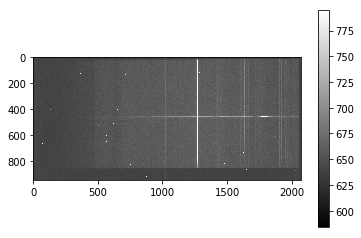

In [18]:
vmin = np.mean(image_data) - np.std(image_data)
vmax = np.mean(image_data) + 2.*np.std(image_data)


plt.imshow(image_data, cmap='gray', vmin=vmin, vmax=vmax)
plt.colorbar()

# To see more color maps
# http://wiki.scipy.org/Cookbook/Matplotlib/Show_colormaps

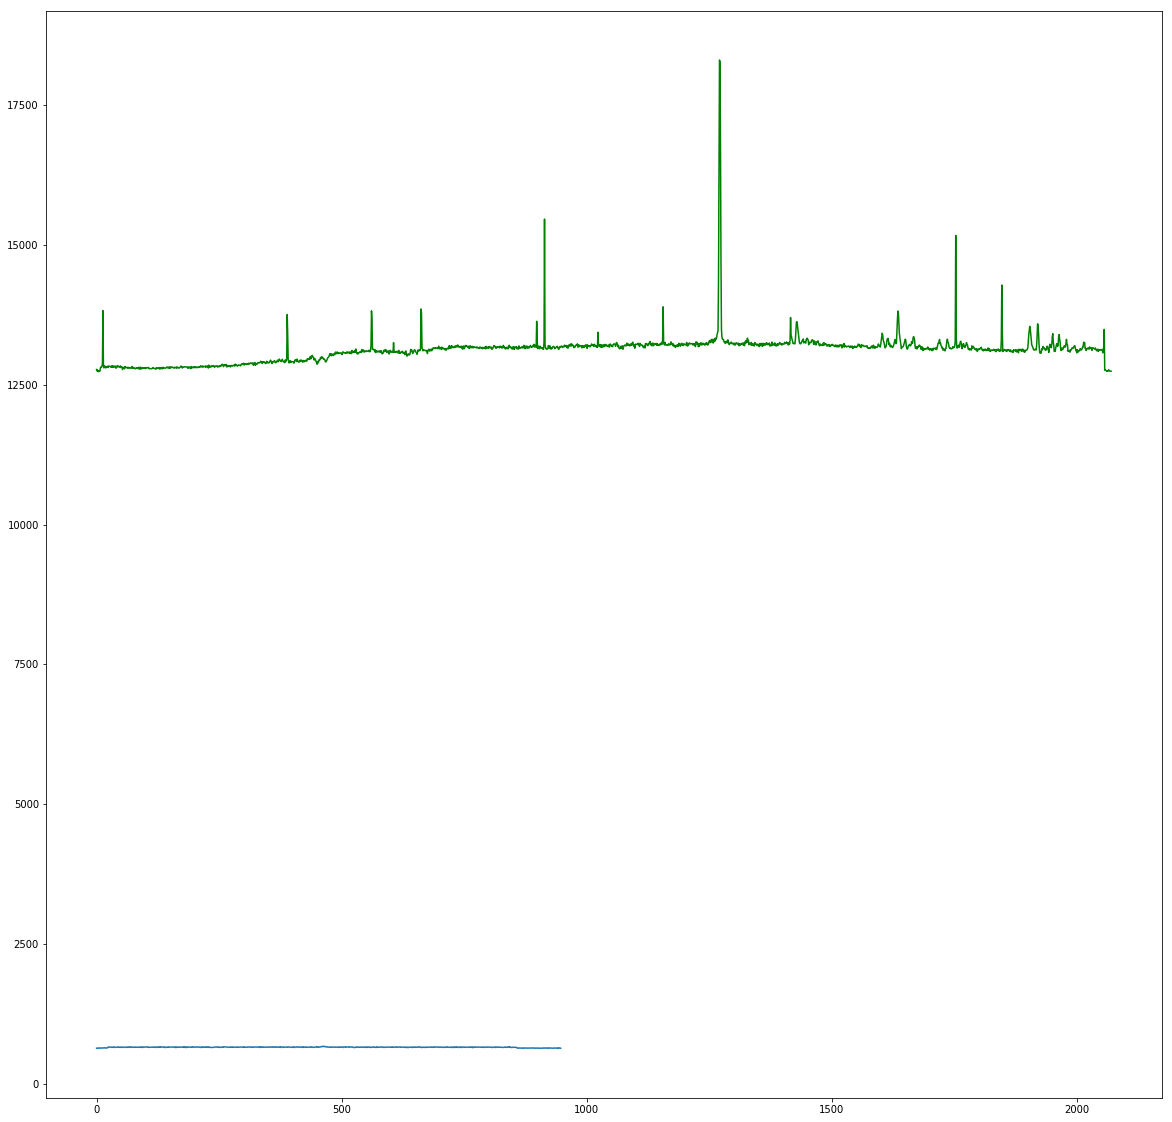

In [38]:
fig = plt.figure(figsize=(20,20))
sum1d = np.sum(image_data[675:695,:],axis=0)
x=np.arange(0,sum1d.size)
scatter = plt.plot(image_data[:,660:661]) 
plt.plot(x, sum1d, 'g-')

In [ ]:
sum1d = np.sum(image_data[aper_row_min:aper_row_max,:],axis=0)

#x=np.arange(0,2071)
x=np.arange(0,sum1d.size)

# Running median...
x_series = pd.Series(x, name='x')
sum1d_series = pd.Series(sum1d, name='counts')
df_sum1d = pd.concat([x_series,sum1d_series], axis=1)
df_sum1d.loc[:,'wavelength'] = dispersion*df_sum1d.loc[:,'x'] + wavelength0
wave = df_sum1d.wavelength.values
df_sum1d_smoothed = df_sum1d.rolling(101).median().dropna()
x_smoothed = df_sum1d_smoothed.x.values
wave_smoothed = df_sum1d_smoothed.wavelength.values
sum1d_smoothed = df_sum1d_smoothed.counts.values


plt.figure(4)
plt.plot(x, sum1d, 'g-', 
         x_smoothed, sum1d_smoothed, 'y-')